# Import

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
  confusion_matrix, ConfusionMatrixDisplay, mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

# Dataset

In [3]:
# df = pd.read_csv('KDDTrain+_20Percent.txt', header=None)
df = pd.read_csv('KDDTest-21.txt', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,13,tcp,telnet,SF,118,2425,0,0,0,0,...,0.38,0.12,0.04,0.0,0.00,0.00,0.12,0.3,guess_passwd,2
1,0,udp,private,SF,44,0,0,0,0,0,...,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,snmpguess,12
2,0,tcp,telnet,S3,0,44,0,0,0,0,...,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,processtable,18
3,0,udp,private,SF,53,55,0,0,0,0,...,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal,17
4,0,tcp,private,SH,0,0,0,0,0,0,...,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,nmap,17


In [4]:
columns = ([
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate' ,
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'class', 'level'
])
df.columns = columns
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,level
0,13,tcp,telnet,SF,118,2425,0,0,0,0,...,0.38,0.12,0.04,0.00,0.00,0.00,0.12,0.30,guess_passwd,2
1,0,udp,private,SF,44,0,0,0,0,0,...,1.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,snmpguess,12
2,0,tcp,telnet,S3,0,44,0,0,0,0,...,0.31,0.61,0.00,0.00,0.21,0.68,0.60,0.00,processtable,18
3,0,udp,private,SF,53,55,0,0,0,0,...,1.00,0.00,0.87,0.00,0.00,0.00,0.00,0.00,normal,17
4,0,tcp,private,SH,0,0,0,0,0,0,...,0.06,1.00,1.00,0.00,1.00,1.00,0.00,0.00,nmap,17
5,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.90,0.01,0.00,0.00,0.00,0.00,0.01,0.00,back,10
6,0,tcp,imap4,REJ,0,0,0,0,0,0,...,0.04,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,19
7,7570,tcp,telnet,SF,0,44,0,0,0,0,...,0.65,0.33,0.00,0.00,0.49,0.76,0.33,0.01,processtable,18
8,0,udp,private,SF,56,52,0,0,0,0,...,1.00,0.00,0.93,0.00,0.00,0.00,0.00,0.00,normal,17
9,0,tcp,ftp_data,SF,192,0,0,0,0,0,...,0.09,0.04,0.09,0.04,0.00,0.00,0.01,0.00,normal,20


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11850 entries, 0 to 11849
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     11850 non-null  int64  
 1   protocol_type                11850 non-null  object 
 2   service                      11850 non-null  object 
 3   flag                         11850 non-null  object 
 4   src_bytes                    11850 non-null  int64  
 5   dst_bytes                    11850 non-null  int64  
 6   land                         11850 non-null  int64  
 7   wrong_fragment               11850 non-null  int64  
 8   urgent                       11850 non-null  int64  
 9   hot                          11850 non-null  int64  
 10  num_failed_logins            11850 non-null  int64  
 11  logged_in                    11850 non-null  int64  
 12  num_compromised              11850 non-null  int64  
 13  root_shell      

In [6]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,11850.000000,1.185000e+04,1.185000e+04,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,...,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000
mean,415.439831,1.945644e+04,1.228105e+03,0.000591,0.016034,0.001350,0.190211,0.041181,0.253080,0.227679,...,117.541603,0.539597,0.148986,0.206493,0.024465,0.104181,0.106697,0.263952,0.252209,15.326835
std,1919.441623,6.519865e+05,2.389603e+04,0.024299,0.196379,0.050299,1.222392,0.205401,0.434795,10.025774,...,106.563438,0.423370,0.288758,0.379193,0.114234,0.265086,0.278549,0.377337,0.403039,4.407479
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,0.070000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
50%,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,83.000000,0.530000,0.020000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,17.000000
75%,1.000000,1.600000e+02,9.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,250.000000,1.000000,0.070000,0.090000,0.000000,0.010000,0.000000,0.560000,0.520000,18.000000
max,57715.000000,6.282565e+07,1.288652e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000


In [7]:
df.loc[df['class'] == "normal", "class"] = 'normal'
df.loc[df['class'] != 'normal', "class"] = 'attack'

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,level
0,13,tcp,telnet,SF,118,2425,0,0,0,0,...,0.38,0.12,0.04,0.0,0.00,0.00,0.12,0.3,attack,2
1,0,udp,private,SF,44,0,0,0,0,0,...,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,attack,12
2,0,tcp,telnet,S3,0,44,0,0,0,0,...,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,attack,18
3,0,udp,private,SF,53,55,0,0,0,0,...,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal,17
4,0,tcp,private,SH,0,0,0,0,0,0,...,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,attack,17


# Visualization

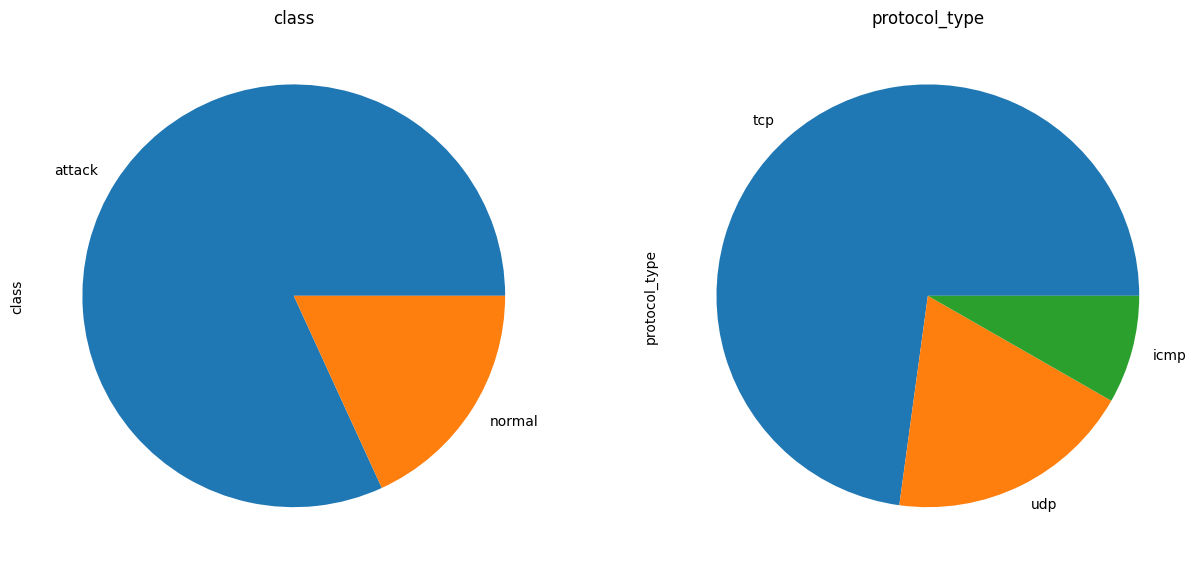

In [8]:
def pie_plot(df, cols_list, rows, cols):
  fig, axes = plt.subplots(rows, cols)
  for ax, col in zip(axes.ravel(), cols_list):
    df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10)
    ax.set_title(str(col), fontsize=12)

pie_plot(df, ['class', 'protocol_type', 'flag'], 1, 2)

# Preprocessing

In [9]:
dropped_columns = [
    'is_host_login', 'protocol_type', 'service', 'flag', 'land', 'logged_in',
    'is_guest_login', 'level', 'class'
]

def Scaling(data, columns):
  scaler = RobustScaler()
  scaler_fit_transform = scaler.fit_transform(data)

  return pd.DataFrame(scaler_fit_transform, columns=columns)

def preprocess(data):
  preprocess_df = data.drop(dropped_columns, axis=1)
  preprocess_columns = preprocess_df.columns

  scaled_df = Scaling(preprocess_df, preprocess_columns)

  data.drop(labels=preprocess_columns, axis="columns", inplace=True)
  data[preprocess_columns] = scaled_df[preprocess_columns]

  data.loc[data['class'] == "normal", "class"] = 0
  data.loc[data['class'] != 0, "class"] = 1

  data = pd.get_dummies(data, columns=['protocol_type', 'service', 'flag'])

  return data

In [10]:
scaled_data = preprocess(df)
print(scaled_data)

       land  logged_in  is_host_login  is_guest_login class  level  duration  \
0         0          1              0               0     1      2      13.0   
1         0          0              0               0     1     12       0.0   
2         0          0              0               0     1     18       0.0   
3         0          0              0               0     0     17       0.0   
4         0          0              0               0     1     17       0.0   
...     ...        ...            ...             ...   ...    ...       ...   
11845     0          0              0               0     0     18       0.0   
11846     0          1              0               0     0     18       0.0   
11847     0          0              0               0     1     13       1.0   
11848     0          0              0               0     1     15       0.0   
11849     0          0              0               0     1     17       0.0   

       src_bytes  dst_bytes  wrong_frag

In [11]:
x = scaled_data.drop(['class', 'level'], axis=1).values
y = df['class'].values
y_reg = df['level'].values

In [12]:
n_components = 20
pca = PCA(n_components).fit(x)
x_reduced = pca.transform(x)
print(x_reduced)

print(f"The original features before PCA {x.shape[1]}")
print(f"Reduced features after PCA {x_reduced.shape[1]}")

[[-1.20660679e+02 -4.02596257e+02  2.11678617e+01 ... -1.58925164e-01
  -6.34909484e-02 -2.65318521e-01]
 [-1.21332033e+02 -4.15538555e+02 -7.15397392e+00 ...  1.60661362e-01
   1.11879576e-01  9.00913183e-02]
 [-1.21606553e+02 -4.15492580e+02 -6.73766685e+00 ...  5.10258383e-01
   1.11293856e+00 -3.81321753e-01]
 ...
 [-1.21572450e+02 -4.14672550e+02 -6.18769621e+00 ...  4.48555697e-01
   3.80193919e-01  1.83754569e-02]
 [-1.21570212e+02 -4.15698836e+02 -6.25986629e+00 ...  4.86997250e-02
   1.04925331e-01  3.12836620e-01]
 [-1.21350625e+02 -4.15536221e+02 -7.15221305e+00 ...  1.76166421e-01
  -4.29644787e-02  1.51757238e-01]]
The original features before PCA 114
Reduced features after PCA 20


# Test Train Split

In [13]:
y = y.astype('int')

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)

print(x_test.shape)

x_train_red, x_test_red, y_train_red, y_test_red = train_test_split(
    x_reduced,
    y,
    test_size=0.2,
    random_state=42
)

print(x_test.shape)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(
    x,
    y_reg,
    test_size=0.2,
    random_state=42
)

(2370, 114)
(2370, 114)


# Classifier Executor

In [14]:
algorithms = {}
def algorithms_executor(model, name, x_train, x_test, y_train, y_test):
  train_actual = y_train
  train_predicted = model.predict(x_train)

  test_actual = y_test
  test_predicted = model.predict(x_test)

  train_accuracy = accuracy_score(train_actual, train_predicted)
  test_accuracy = accuracy_score(test_actual, test_predicted)

  train_precision = precision_score(train_actual, train_predicted, pos_label=0)
  test_precision = precision_score(test_actual, test_predicted, pos_label=0)

  train_recall = recall_score(train_actual, train_predicted, pos_label=0)
  test_recall = recall_score(test_actual, test_predicted, pos_label=0)

  train_f1 = f1_score(train_actual, train_predicted, pos_label=0)
  test_f1 = f1_score(test_actual, test_predicted, pos_label=0)

  algorithms[name] = [train_accuracy, test_accuracy, train_precision, test_precision, train_f1, test_f1]

  print(f"Training Accuracy {name} {train_accuracy*100:.2f} Test Accuracy {name} {test_accuracy*100:.2f}")
  print(f"Training Precision {name} {train_precision*100:.2f} Test Precision {name} {test_precision*100:.2f}")
  print(f"Training Recall {name} {train_recall*100:.2f} Test Recall {name} {test_recall*100:.2f}")
  print(f"Training F1 {name} {train_f1*100:.2f} Test F1 {name} {test_f1*100:.2f}")

  cm = confusion_matrix(test_actual, test_predicted)
  cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Attack'])

  fig, ax = plt.subplots(figsize=(10,10))
  ax.grid(False)
  cm_display.plot(ax=ax)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy Logistic Regression 86.33 Test Accuracy Logistic Regression 85.91
Training Precision Logistic Regression 69.90 Test Precision Logistic Regression 70.93
Training Recall Logistic Regression 42.51 Test Recall Logistic Regression 41.40
Training F1 Logistic Regression 52.87 Test F1 Logistic Regression 52.29


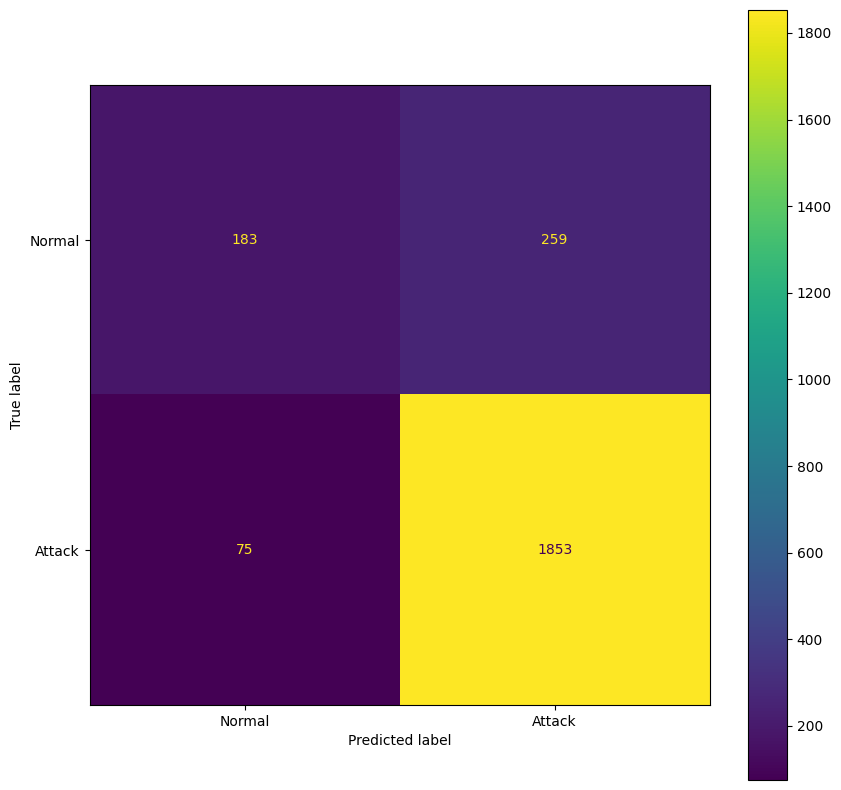

In [15]:
model = LogisticRegression().fit(x_train, y_train)
name = "Logistic Regression"
algorithms_executor(model, name, x_train, x_test, y_train, y_test)

Training Accuracy KNN 94.08 Test Accuracy KNN 93.42
Training Precision KNN 90.32 Test Precision KNN 91.33
Training Recall KNN 75.26 Test Recall KNN 71.49
Training F1 KNN 82.11 Test F1 KNN 80.20


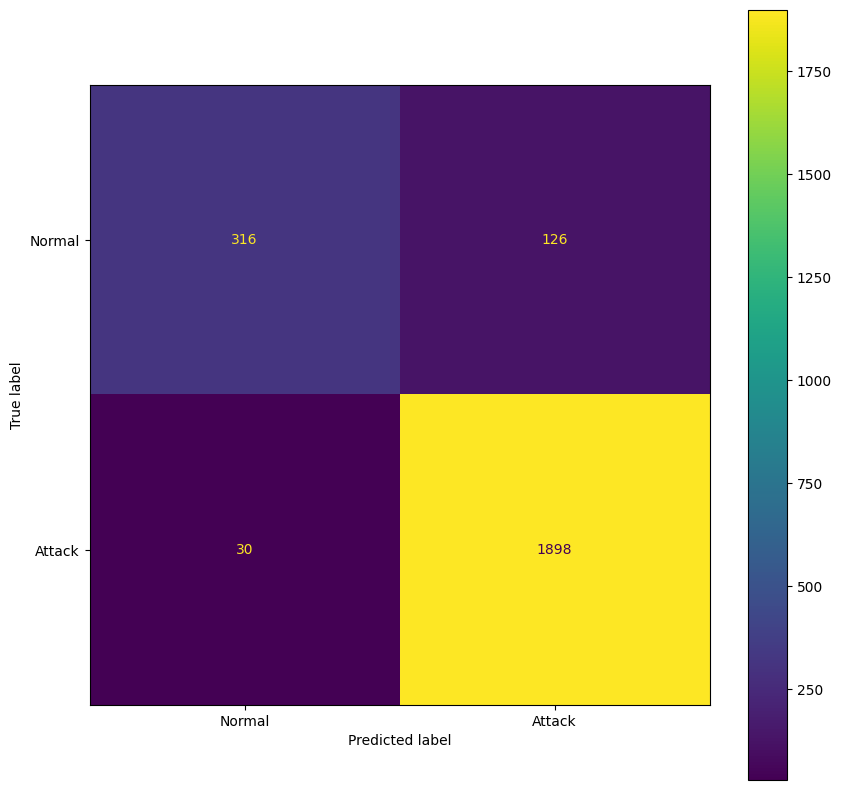

In [16]:
model = KNeighborsClassifier(n_neighbors=20).fit(x_train, y_train)
name = "KNN"
algorithms_executor(model, name, x_train, x_test, y_train, y_test)

Training Accuracy Naive Bayes 79.63 Test Accuracy Naive Bayes 79.11
Training Precision Naive Bayes 46.65 Test Precision Naive Bayes 46.75
Training Recall Naive Bayes 90.00 Test Recall Naive Bayes 86.20
Training F1 Naive Bayes 61.45 Test F1 Naive Bayes 60.62


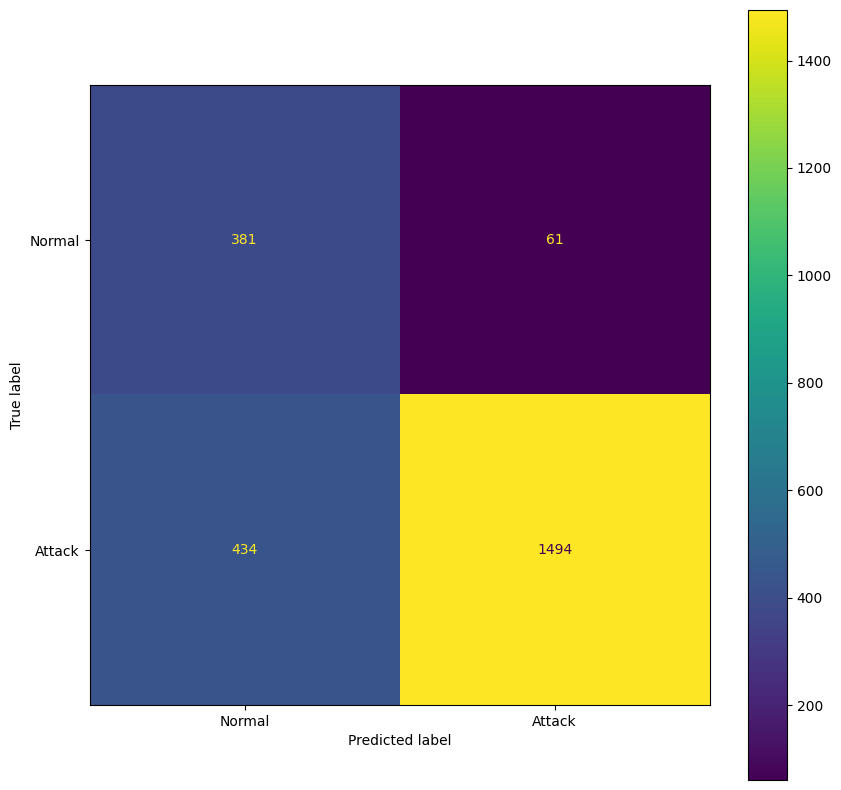

In [17]:
model = GaussianNB().fit(x_train, y_train)
name = "Naive Bayes"
algorithms_executor(model, name, x_train, x_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy Linear SVC 92.35 Test Accuracy Linear SVC 92.36
Training Precision Linear SVC 84.51 Test Precision Linear SVC 84.99
Training Recall Linear SVC 70.53 Test Recall Linear SVC 71.72
Training F1 Linear SVC 76.89 Test F1 Linear SVC 77.79


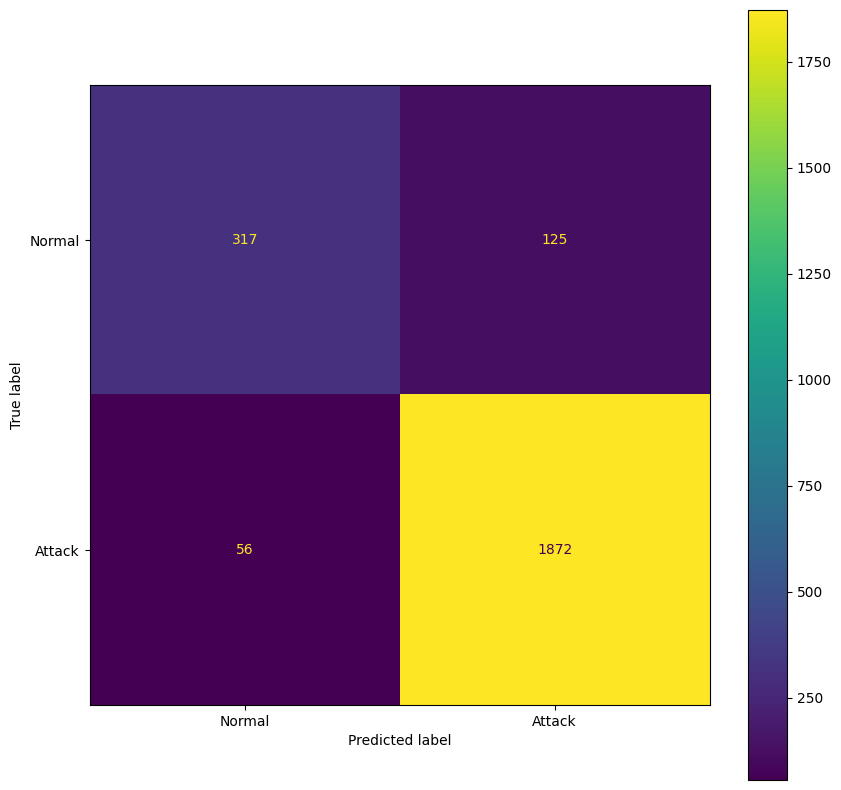

In [18]:
model = LinearSVC().fit(x_train, y_train)
name = "Linear SVC"
algorithms_executor(model, name, x_train, x_test, y_train, y_test)

# Feature importances

In [19]:
def f_importances(model_name, coef, names, top=-1):
  imp = coef
  imp, names = zip(*sorted(list(zip(imp, names))))

  if top == -1:
    top = len(names)

  plt.figure(figsize=(10,10))
  plt.barh(range(top), imp[::-1][0:top], align='center')
  plt.yticks(range(top), names[::-1][0:top])
  plt.title(f"Feature importances for model {model_name}")
  plt.show()

## Decision Tree

Training Accuracy DT 93.12 Test Accuracy DT 93.00
Training Precision DT 94.45 Test Precision DT 95.10
Training Recall DT 65.73 Test Recall DT 65.84
Training F1 DT 77.52 Test F1 DT 77.81


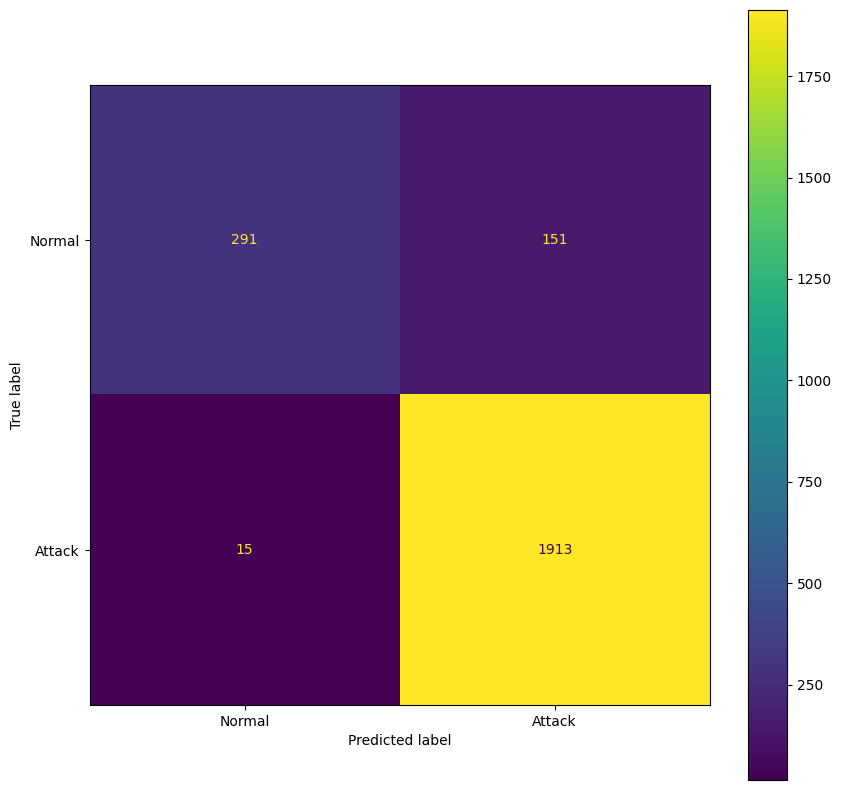

In [20]:
model = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
name = "DT"
algorithms_executor(model, name, x_train, x_test, y_train, y_test)

### Feature Importances

      protocol_type   service  flag  land  logged_in  is_host_login  \
0               tcp    telnet    SF     0          1              0   
1               udp   private    SF     0          0              0   
2               tcp    telnet    S3     0          0              0   
3               udp   private    SF     0          0              0   
4               tcp   private    SH     0          0              0   
...             ...       ...   ...   ...        ...            ...   
11845           udp  domain_u    SF     0          0              0   
11846           tcp      http    SF     0          1              0   
11847           tcp    telnet  RSTO     0          0              0   
11848           tcp    sunrpc   REJ     0          0              0   
11849           udp   private    SF     0          0              0   

       is_guest_login  duration  src_bytes  dst_bytes  ...  dst_host_count  \
0                   0      13.0    0.56250  26.075269  ...          -

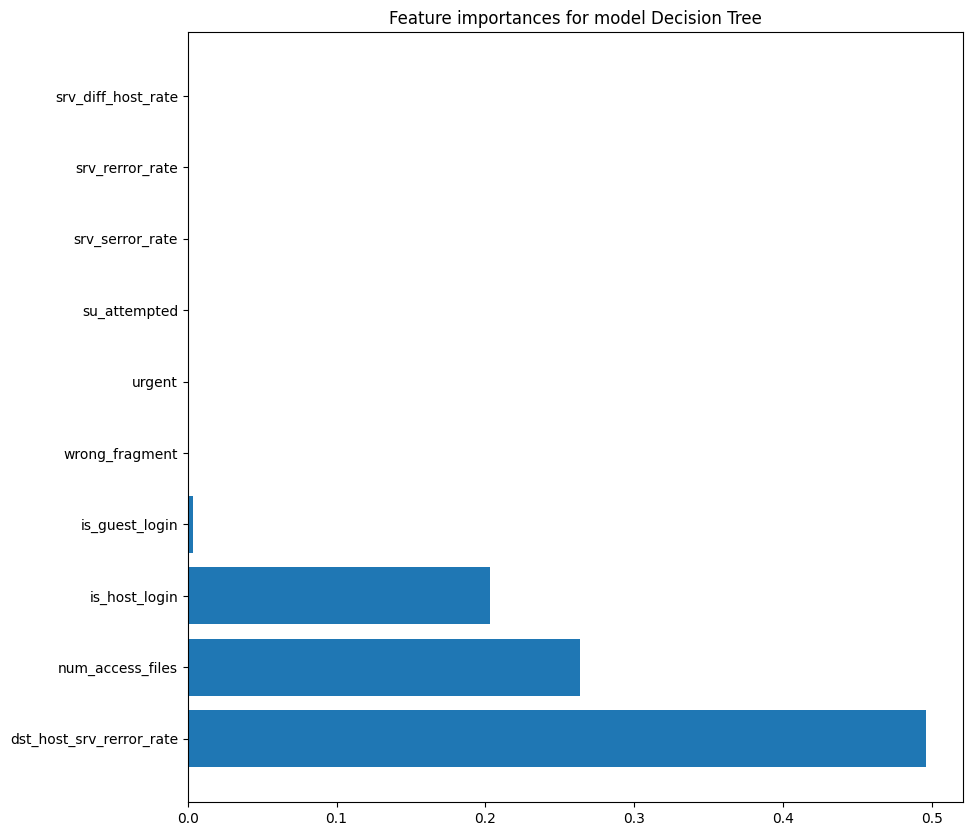

In [21]:
feature_names = df.drop(['class', 'level'], axis=1)
print(feature_names)
f_importances("Decision Tree", abs(model.feature_importances_), feature_names, top=10)

### Plot Tree

[Text(0.5, 0.875, 'x[40] <= 0.5\ngini = 0.296\nsamples = 9480\nvalue = [1710, 7770]'),
 Text(0.25, 0.625, 'x[5] <= 0.866\ngini = 0.142\nsamples = 7683\nvalue = [591, 7092]'),
 Text(0.125, 0.375, 'x[88] <= 0.5\ngini = 0.058\nsamples = 5542\nvalue = [167, 5375]'),
 Text(0.0625, 0.125, 'gini = 0.046\nsamples = 5501\nvalue = [131, 5370]'),
 Text(0.1875, 0.125, 'gini = 0.214\nsamples = 41\nvalue = [36, 5]'),
 Text(0.375, 0.375, 'x[5] <= 2.778\ngini = 0.318\nsamples = 2141\nvalue = [424, 1717]'),
 Text(0.3125, 0.125, 'gini = 0.277\nsamples = 241\nvalue = [201, 40]'),
 Text(0.4375, 0.125, 'gini = 0.207\nsamples = 1900\nvalue = [223, 1677]'),
 Text(0.75, 0.625, 'x[20] <= 0.233\ngini = 0.47\nsamples = 1797\nvalue = [1119, 678]'),
 Text(0.625, 0.375, 'x[5] <= 0.303\ngini = 0.386\nsamples = 889\nvalue = [232, 657]'),
 Text(0.5625, 0.125, 'gini = 0.249\nsamples = 597\nvalue = [87, 510]'),
 Text(0.6875, 0.125, 'gini = 0.5\nsamples = 292\nvalue = [145, 147]'),
 Text(0.875, 0.375, 'x[6] <= 0.161\ngin

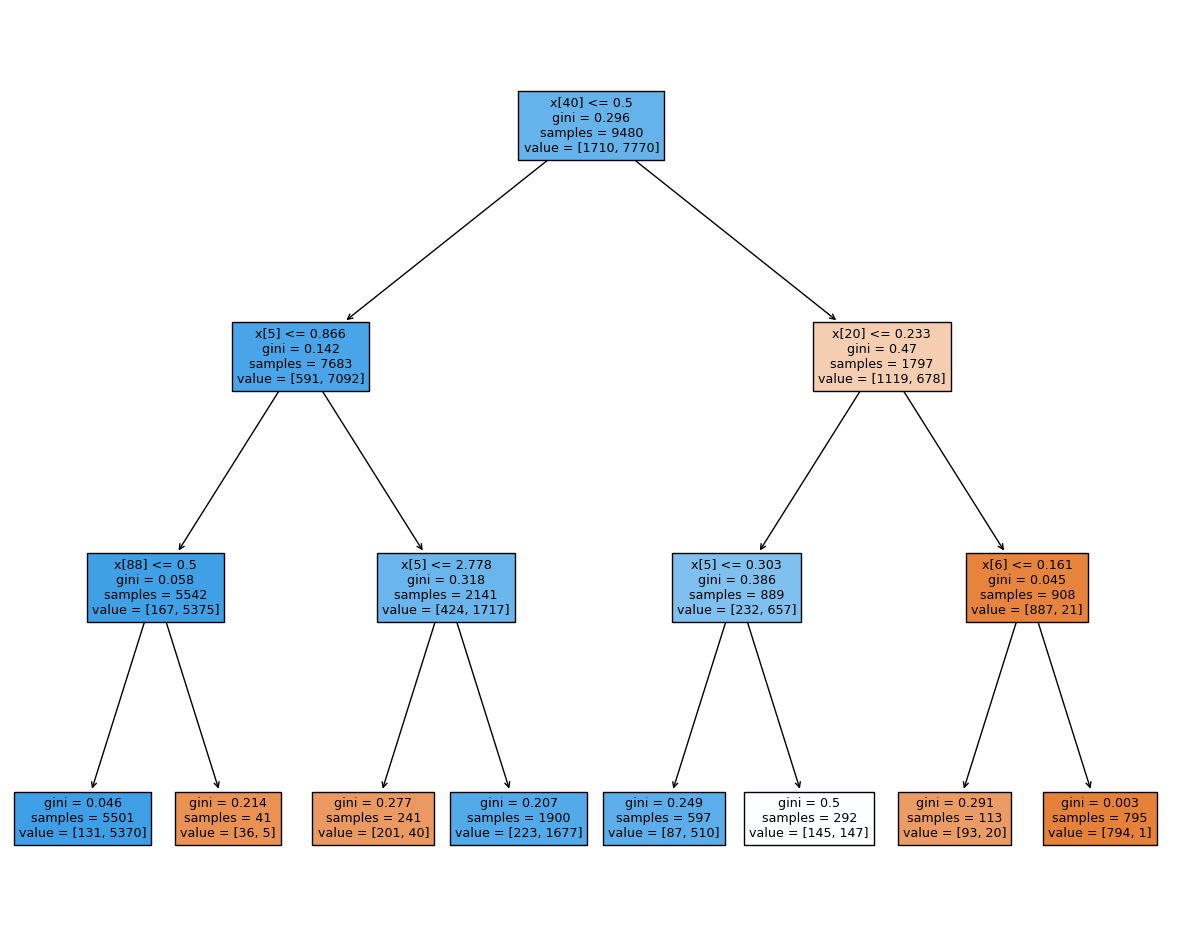

In [22]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(model, filled=True)

## Random Forest

### Feature Importances

Training Accuracy RF 99.63 Test Accuracy RF 97.68
Training Precision RF 99.18 Test Precision RF 94.48
Training Recall RF 98.77 Test Recall RF 92.99
Training F1 RF 98.97 Test F1 RF 93.73


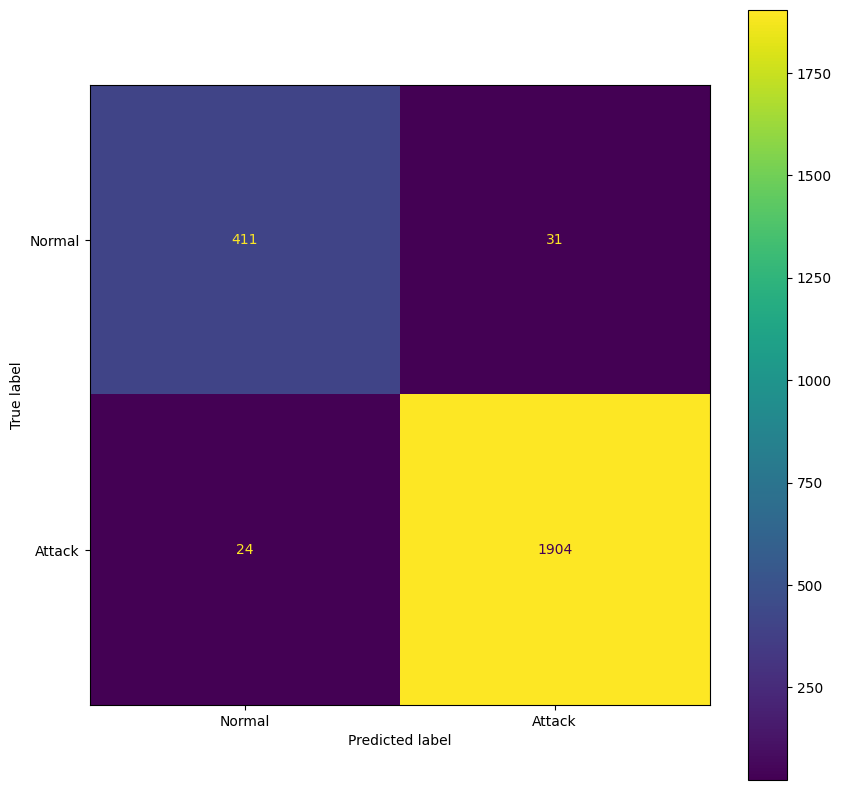

In [23]:
model = RandomForestClassifier().fit(x_train, y_train)
name = "RF"
algorithms_executor(model, name, x_train, x_test, y_train, y_test)

      protocol_type   service  flag  land  logged_in  is_host_login  \
0               tcp    telnet    SF     0          1              0   
1               udp   private    SF     0          0              0   
2               tcp    telnet    S3     0          0              0   
3               udp   private    SF     0          0              0   
4               tcp   private    SH     0          0              0   
...             ...       ...   ...   ...        ...            ...   
11845           udp  domain_u    SF     0          0              0   
11846           tcp      http    SF     0          1              0   
11847           tcp    telnet  RSTO     0          0              0   
11848           tcp    sunrpc   REJ     0          0              0   
11849           udp   private    SF     0          0              0   

       is_guest_login  duration  src_bytes  dst_bytes  ...  dst_host_count  \
0                   0      13.0    0.56250  26.075269  ...          -

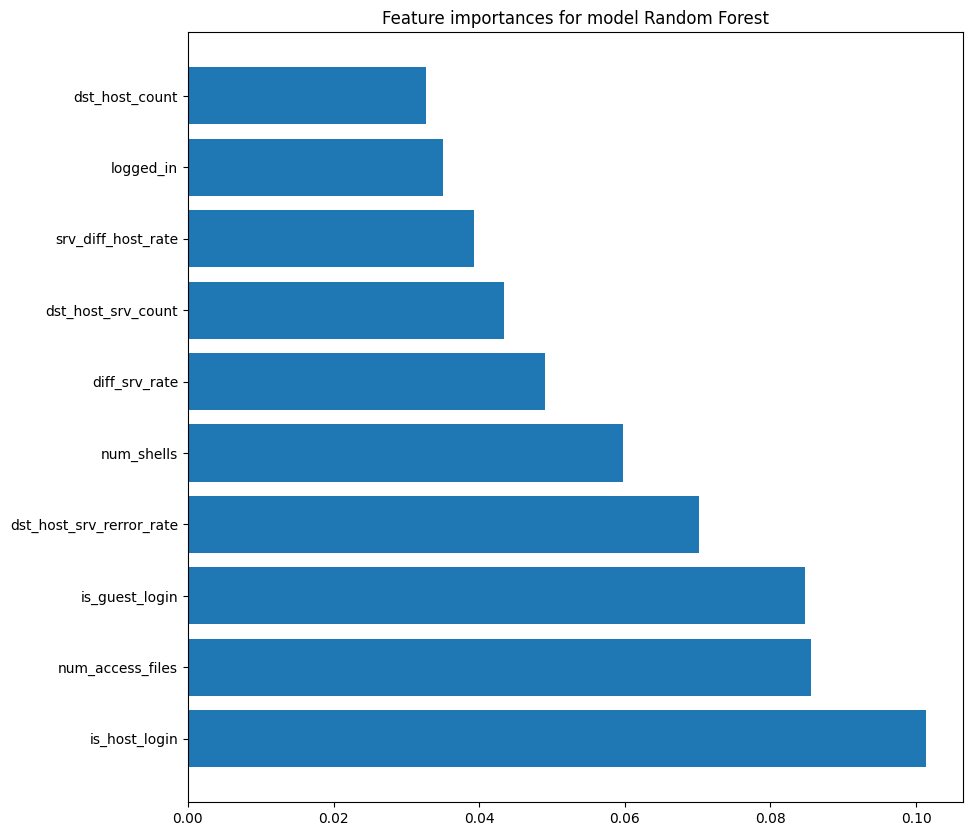

In [24]:
feature_names = df.drop(['class', 'level'], axis=1)
print(feature_names)
f_importances("Random Forest", abs(model.feature_importances_), feature_names, top=10)

# XGB Regressor

In [25]:
xg_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators = 20).fit(x_train_reg, y_train_reg)

name = "XGBoost Regressor"
train_error = mean_squared_error(y_train_reg, xg_regressor.predict(x_train_reg))
print(train_error)

test_error = mean_squared_error(y_test_reg, xg_regressor.predict(x_test_reg))
print(test_error)

3.4973837882304855
4.678394191933325


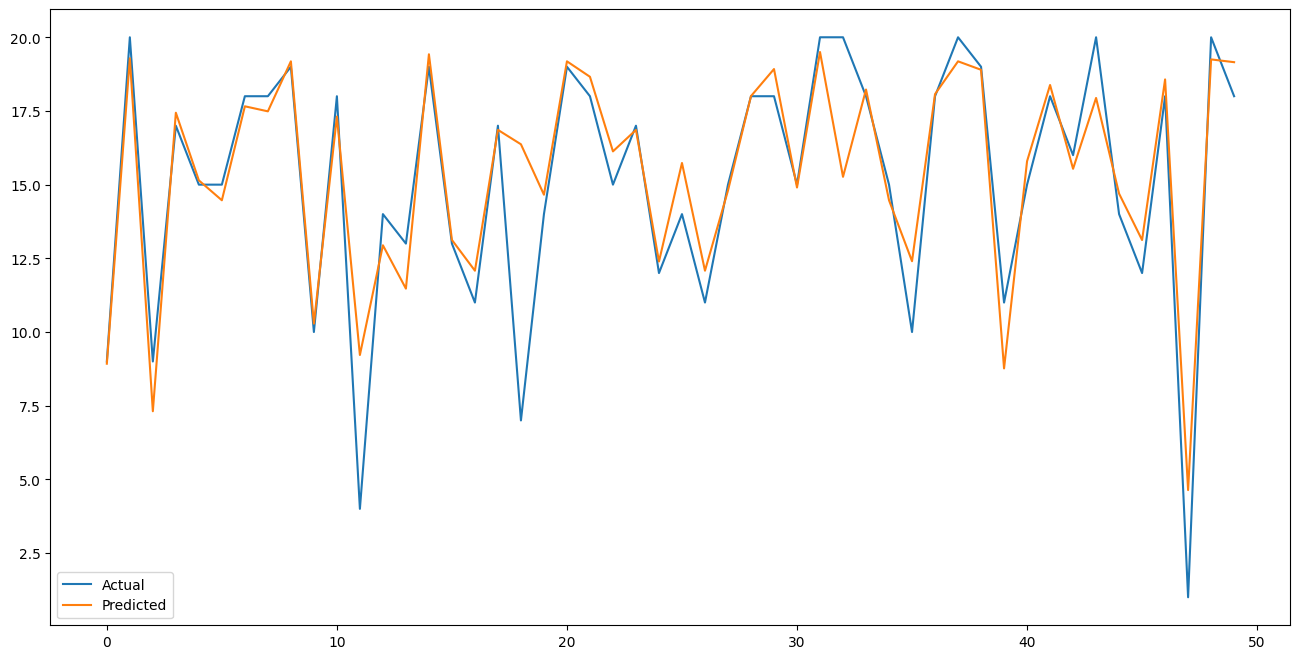

In [26]:
y_pred = xg_regressor.predict(x_test_reg)
data = pd.DataFrame({"Y_test": y_test_reg, "Y_test_prediction": y_pred})
plt.figure(figsize=(16,8))
plt.plot(data[:50])
plt.legend(['Actual', 'Predicted'])

# XBG Classifier

Training Accuracy XGBoost Classification 99.49 Test Accuracy XGBoost Classification 97.93
Training Precision XGBoost Classification 98.31 Test Precision XGBoost Classification 94.56
Training Recall XGBoost Classification 98.89 Test Recall XGBoost Classification 94.34
Training F1 XGBoost Classification 98.60 Test F1 XGBoost Classification 94.45


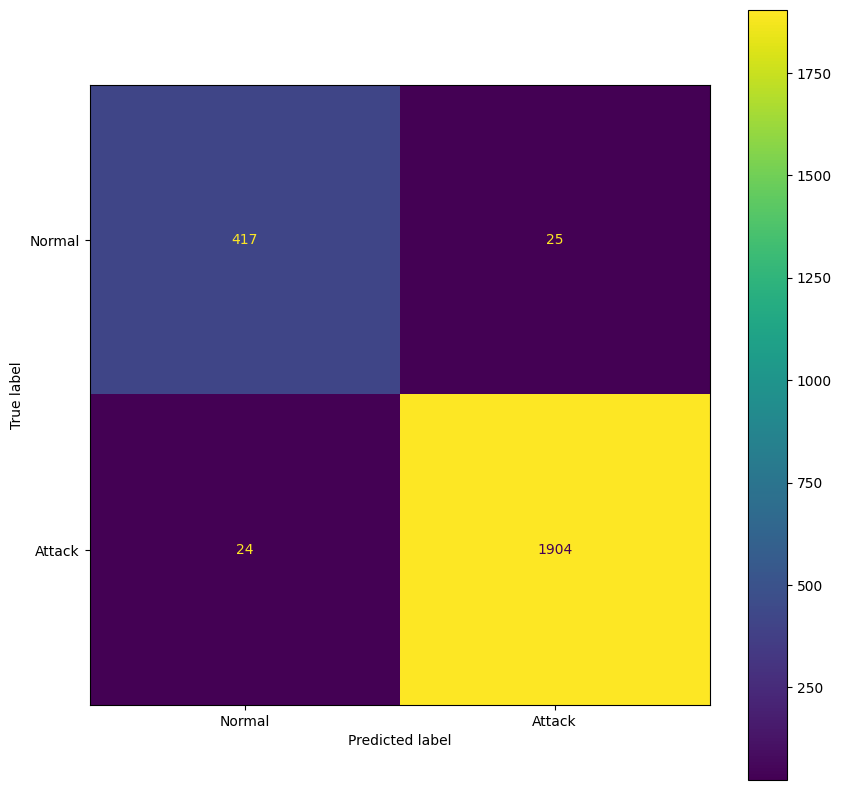

In [27]:
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
xgb_classifier.fit(x_train, y_train)

algorithms_executor(xgb_classifier, "XGBoost Classification", x_train, x_test, y_train, y_test)

# Measuring effect of PCA with Random Forest

Training Accuracy Random Forest with red Data 99.63 Test Accuracy Random Forest with red Data 96.88
Training Precision Random Forest with red Data 98.83 Test Precision Random Forest with red Data 92.99
Training Recall Random Forest with red Data 99.12 Test Recall Random Forest with red Data 90.05
Training F1 Random Forest with red Data 98.98 Test F1 Random Forest with red Data 91.49


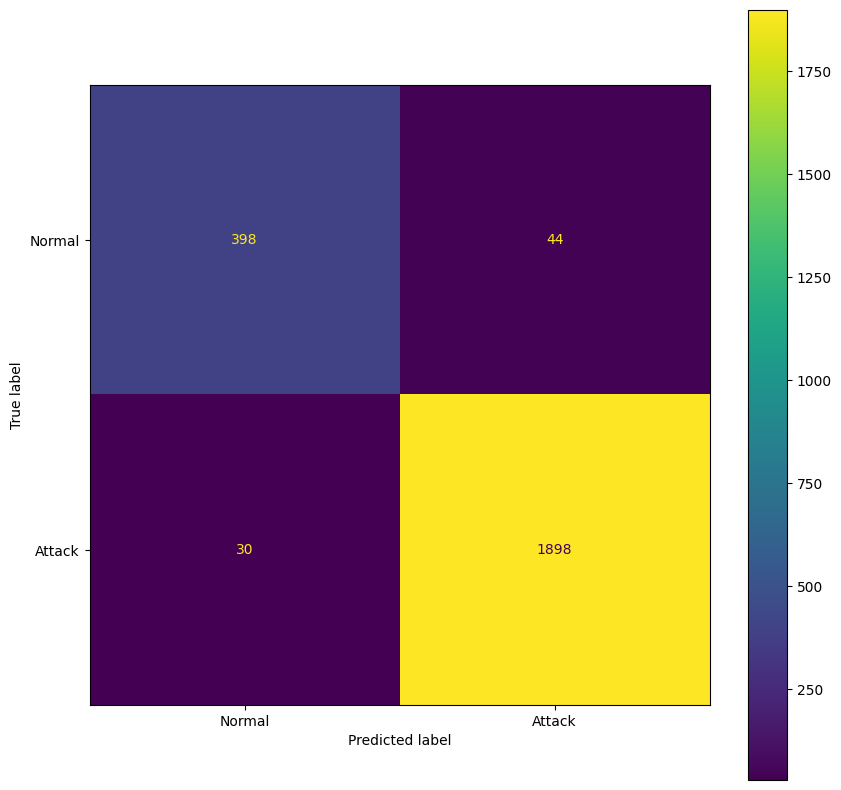

In [28]:
rf = RandomForestClassifier().fit(x_train_red, y_train_red)
algorithms_executor(
    rf,
    "Random Forest with red Data",
    x_train_red, x_test_red,
    y_train_red, y_test_red
)

# Show Results of every algorithms implementation

<ipython-input-29-3818dd99f862>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(keys)


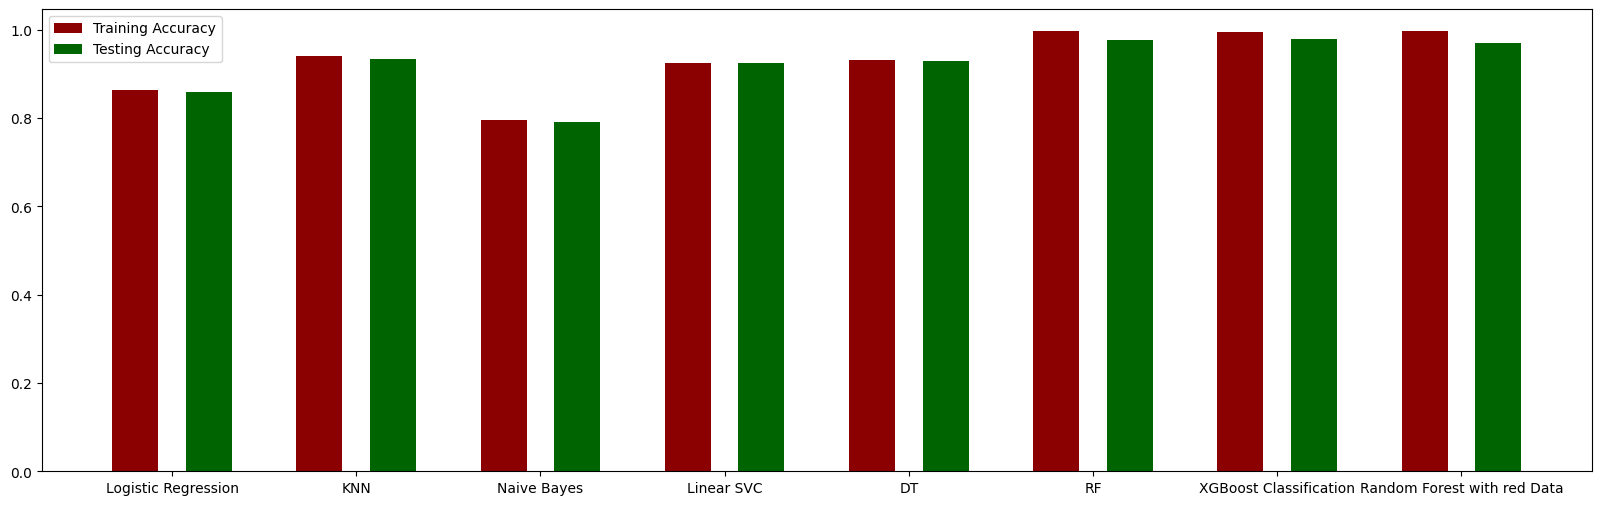

In [29]:
keys = [key for key in algorithms]
values = [value for value in algorithms.values()]

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='darkgreen', width=0.25, align='center')
ax.legend(["Training Accuracy", "Testing Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.show()

<ipython-input-30-92a5cd2e496c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(keys)


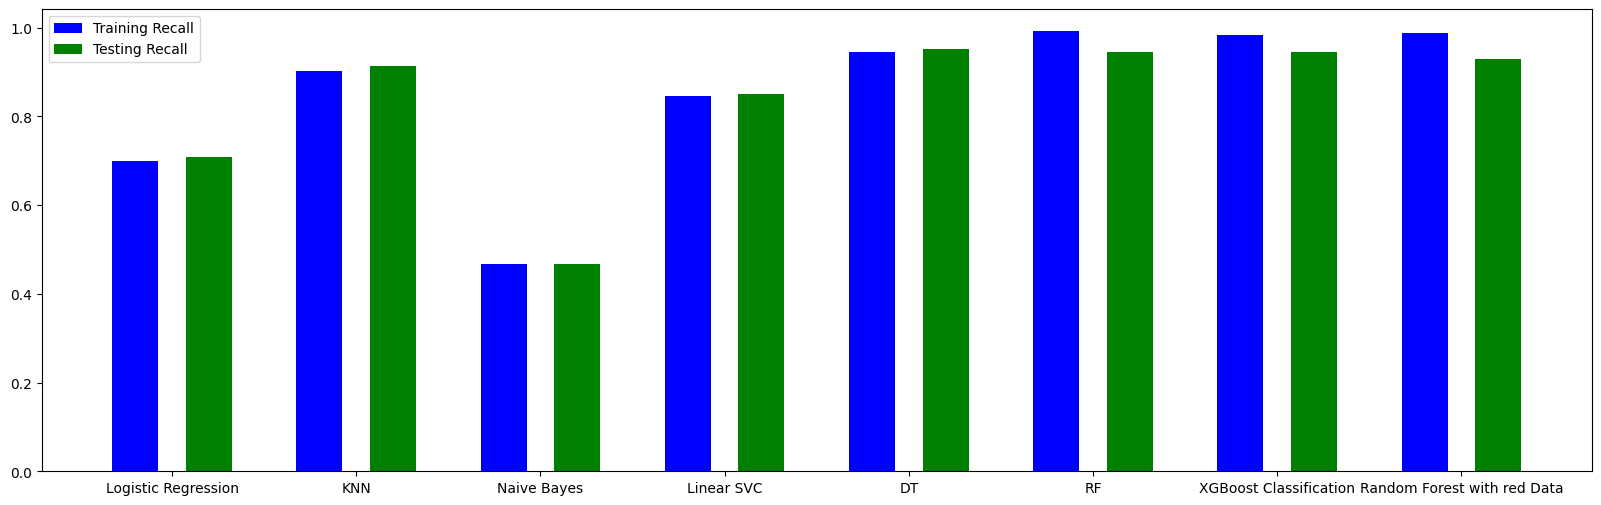

In [30]:
keys = [key for key in algorithms]
values = [value for value in algorithms.values()]

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='blue', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='green', width=0.25, align='center')
ax.legend(["Training Recall", "Testing Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.show()

# Load saved input and model to make new prediction

In [31]:
print(model)
model_filename = 'model.rf.sav'
pickle.dump(model, open(model_filename, 'wb'))

print(x)
x_filename = 'x-data-saved.npy'
np.save(x_filename, x)

RandomForestClassifier()
[[0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [32]:
def predict_with_model(loaded_model, input_data):
    prediction = loaded_model.predict(input_data)
    return prediction

loaded_model = pickle.load(open(model_filename, 'rb'))
input_data = np.load(x_filename)
predict_with_model(loaded_model, input_data)

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
def split_and_predict(loaded_model, input_data, cut_points):
    predictions = []

    for cut_point in cut_points:
        # Cut the input data
        cut_data = input_data[cut_point[0]:cut_point[1]]

        cut_predictions = predict_with_model(loaded_model, cut_data)

        # Create a DataFrame for better presentation
        df_cut = pd.DataFrame(cut_data, columns=[f'Feature_{j}' for j in range(cut_data.shape[1])])
        df_cut['Model_Predictions'] = cut_predictions

        print("===========================================================================")
        print(f"Input Data for Cut Point {cut_point}:")
        print("===========================================================================")
        print(df_cut)

        predictions.extend(cut_predictions)

    return predictions

cut_points = [(0, 5), (5, 10)]
model_predictions = split_and_predict(loaded_model, input_data, cut_points)
print("\nFinal Model Predictions:", model_predictions)

Input Data for Cut Point (0, 5):
   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0        0.0        1.0        0.0        0.0       13.0    0.56250   
1        0.0        0.0        0.0        0.0        0.0    0.10000   
2        0.0        0.0        0.0        0.0        0.0   -0.17500   
3        0.0        0.0        0.0        0.0        0.0    0.15625   
4        0.0        0.0        0.0        0.0        0.0   -0.17500   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_105  Feature_106  \
0  26.075269        0.0        0.0        0.0  ...          0.0          0.0   
1   0.000000        0.0        0.0        0.0  ...          0.0          0.0   
2   0.473118        0.0        0.0        0.0  ...          0.0          0.0   
3   0.591398        0.0        0.0        0.0  ...          0.0          0.0   
4   0.000000        0.0        0.0        0.0  ...          0.0          0.0   

   Feature_107  Feature_108  Feature_109  Feature_110  Feat

# Cross Validation

In [34]:
cv_score_dt = cross_val_score(
    DecisionTreeClassifier(),
    x_train,
    y_train,
    cv=KFold(n_splits = 10),
    scoring='accuracy'
).mean()
print(cv_score_dt)

cv_score_nb = cross_val_score(
    GaussianNB(),
    x_train,
    y_train,
    cv=KFold(n_splits = 5),
    scoring='accuracy'
).mean()
print(cv_score_nb)

0.9682489451476795
0.793987341772152


# Grid Search CV

In [36]:
gs_cv = GridSearchCV(
  DecisionTreeClassifier(),
  {
      'max_depth': [3, 10, 50],
      'criterion': ['gini', 'entropy'],
      # 'max_features': [1, 'log2', 'sqrt', 2.5]
  },
  cv=5
)

gs_cv.fit(x_train, y_train)
print(gs_cv.best_params_)
print(gs_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 10}
0.9703586497890295
